# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=100,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=TwoPointCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.85 and x[1] >= 0.85,
    mutation_probability=0.02,
    population_initializer=VentInitializer(
        population_size=1000,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params,
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 100
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 1000
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.02
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: TwoPoint Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_f

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 5, Population: 978, Unique population: 555, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 10, Population: 970, Unique population: 390, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 16, Population: 890, Unique population: 105, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

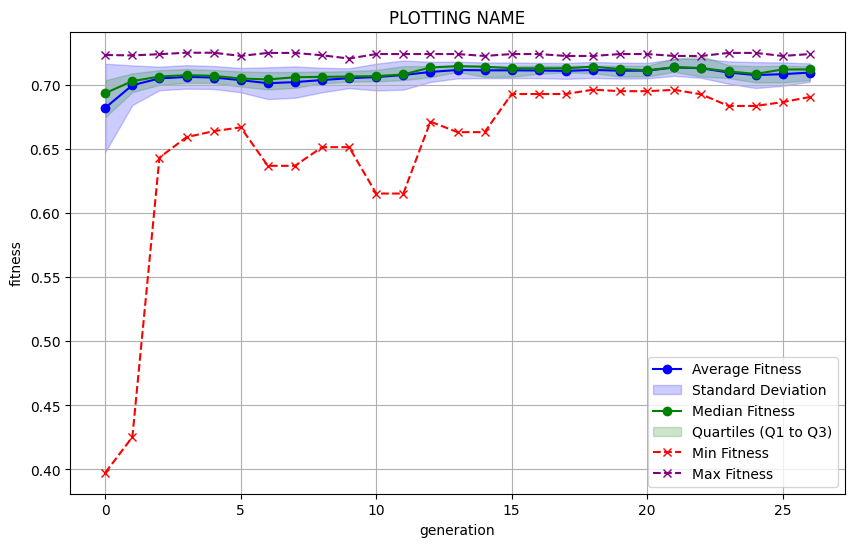

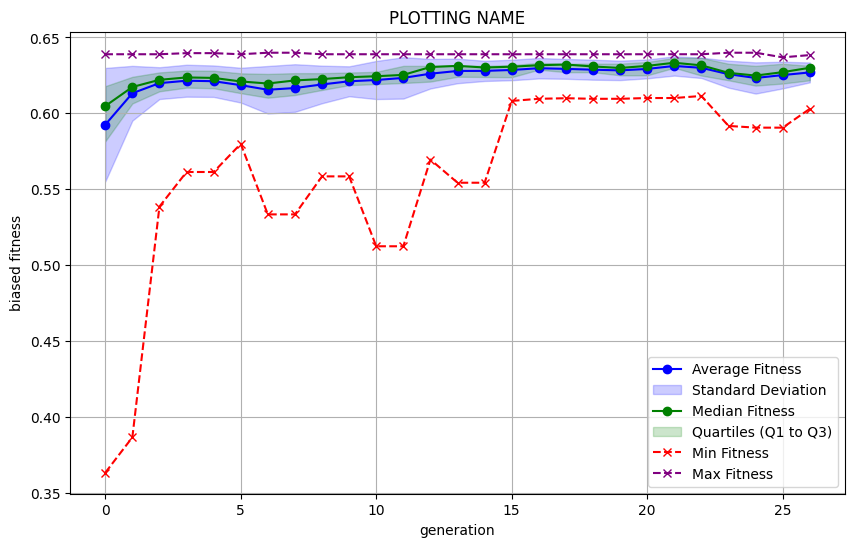

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_132: ['WingShape_693', 'CornerTransformation_132']
predict: (0.28923453902661933, 373.0963861999999, 457.63769589999976)
biased_fitness: 0.6199591308273301, fitness: 0.7039841992338082
shape parameter:
parameter_list: [ c: 3.0850270335125924, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


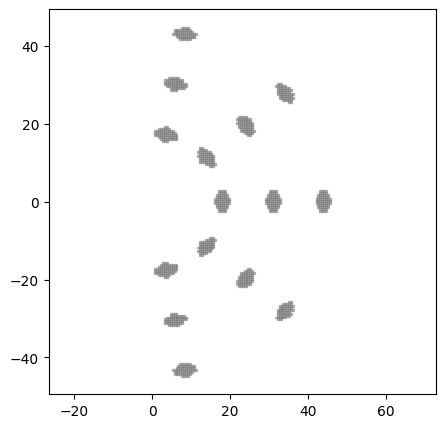

--------------------------------------------------
label: VentHole Chromosome_356: ['CircleShape_669', 'CornerTransformation_132']
predict: (0.28898758597576046, 373.1655058, 458.2838951)
biased_fitness: 0.6217784771393533, fitness: 0.7028771357423952
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


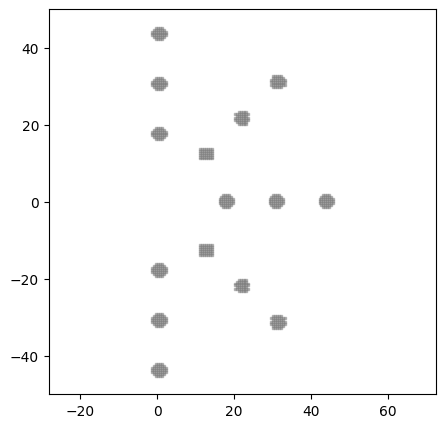

--------------------------------------------------
label: VentHole Chromosome_593: ['WingShape_512', 'CornerTransformation_356']
predict: (0.28856375755765784, 373.02734220000013, 456.8516698)
biased_fitness: 0.6312673435927894, fitness: 0.7149673644234207
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


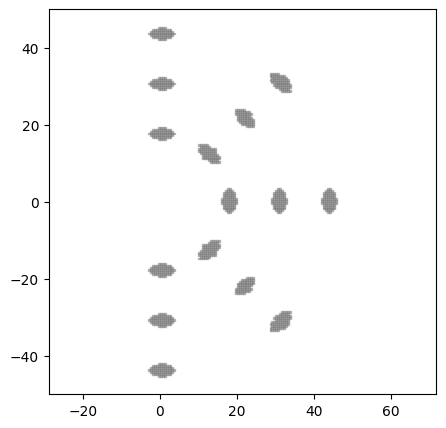

--------------------------------------------------
label: VentHole Chromosome_132: ['CircleShape_97', 'CornerTransformation_97']
predict: (0.2882512070518537, 373.2427884, 457.3474988999999)
biased_fitness: 0.6335741614740483, fitness: 0.7145364929814635
shape parameter:
parameter_list: [ r: 2.156258166334942, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 6.168959139489781, phi: 0.7853981633974483, rot_count: 3.0, ]


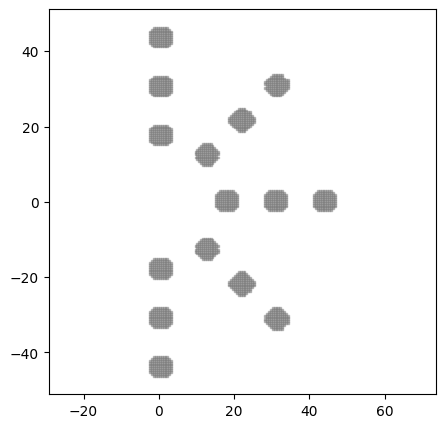

--------------------------------------------------
label: VentHole Chromosome_132: ['CircleShape_132', 'CornerTransformation_330']
predict: (0.2882512070518537, 373.2427884, 457.3474988999999)
biased_fitness: 0.6335741614740483, fitness: 0.7145364929814635
shape parameter:
parameter_list: [ r: 2.156258166334942, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


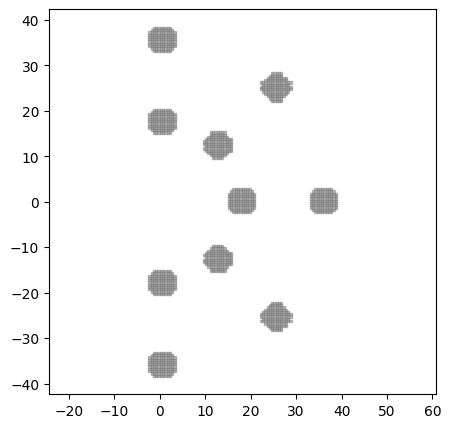

--------------------------------------------------
label: VentHole Chromosome_132: ['WingShape_132', 'CornerTransformation_132']
predict: (0.28829847223548466, 372.79653299999995, 455.7274259)
biased_fitness: 0.6383838719032149, fitness: 0.7243954831451535
shape parameter:
parameter_list: [ c: 3.0850270335125924, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 6.168959139489781, phi: 0.7853981633974483, rot_count: 3.0, ]


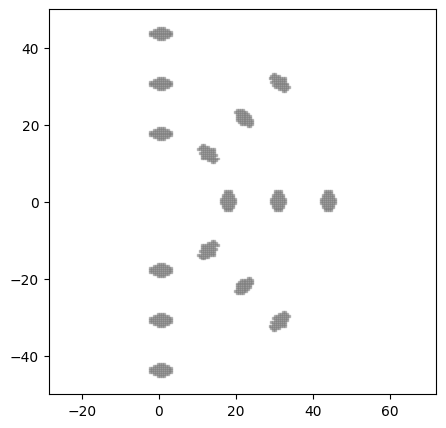

--------------------------------------------------
label: VentHole Chromosome_669: ['WingShape_593', 'CornerTransformation_537']
predict: (0.2889390720707703, 373.28072479999986, 457.2508576)
biased_fitness: 0.6239476518092164, fitness: 0.7079513672922976
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


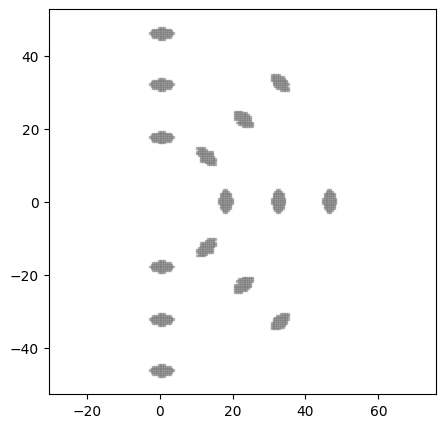

--------------------------------------------------
label: VentHole Chromosome_132: ['WingShape_669', 'CornerTransformation_93']
predict: (0.28856375755765784, 373.02734220000013, 456.8516698)
biased_fitness: 0.6312673435927894, fitness: 0.7149673644234207
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 6.168959139489781, phi: 0.7853981633974483, rot_count: 3.0, ]


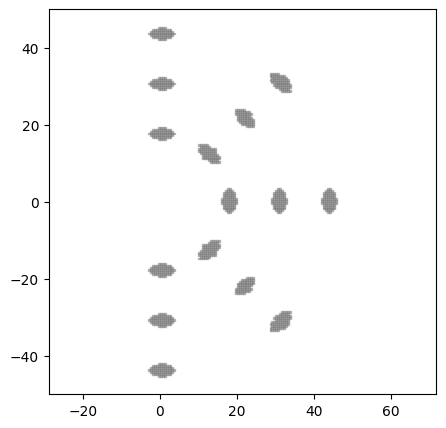

--------------------------------------------------
label: VentHole Chromosome_356: ['WingShape_132', 'CornerTransformation_132']
predict: (0.2894073584394401, 373.3232781999999, 458.24761009999975)
biased_fitness: 0.6151853706478395, fitness: 0.6980719741056007
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


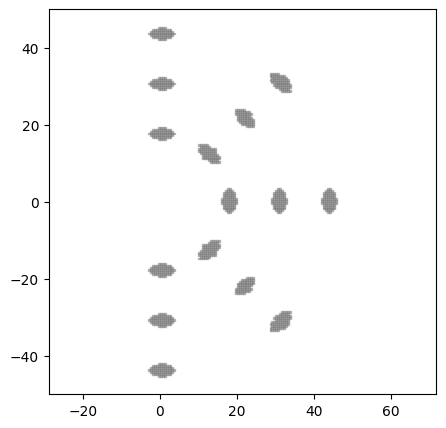

--------------------------------------------------
label: VentHole Chromosome_132: ['CircleShape_669', 'CornerTransformation_132']
predict: (0.28903832490009673, 373.2127905000001, 458.1800027999998)
biased_fitness: 0.6210394932986456, fitness: 0.7026527844990332
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 6.168959139489781, phi: 0.7853981633974483, rot_count: 3.0, ]


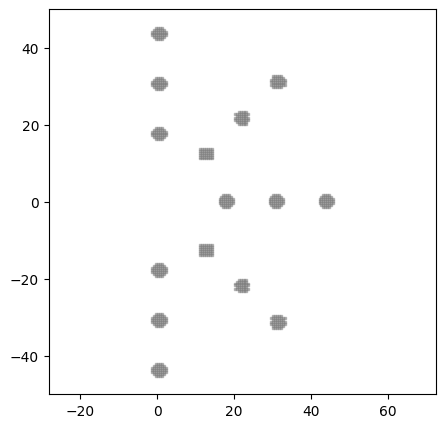

--------------------------------------------------
label: VentHole Chromosome_794: ['CircleShape_132', 'CornerTransformation_669']
predict: (0.28898758597576046, 373.1655058, 458.2838951)
biased_fitness: 0.6217784771393533, fitness: 0.7028771357423952
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


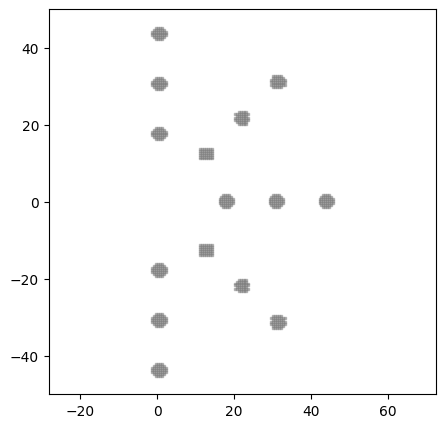

--------------------------------------------------
label: VentHole Chromosome_593: ['WingShape_93', 'CornerTransformation_693']
predict: (0.2882318581388319, 373.0971228, 456.79972489999994)
biased_fitness: 0.6356689222563533, fitness: 0.7181971801116811
shape parameter:
parameter_list: [ c: 3.0850270335125924, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7796645111152577, rot_count: 3.0, ]


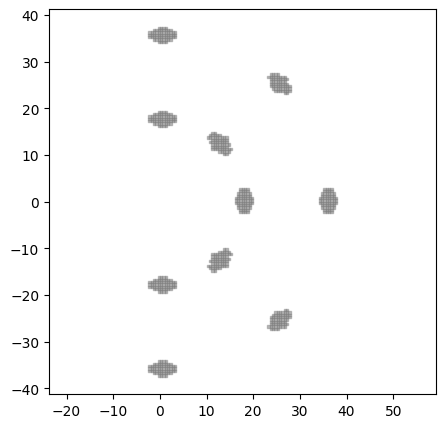

--------------------------------------------------
label: VentHole Chromosome_815: ['CircleShape_669', 'CornerTransformation_593']
predict: (0.2889005050031339, 372.8004323, 457.38010049999997)
biased_fitness: 0.626630567456125, fitness: 0.7100922859686608
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7796645111152577, rot_count: 3.0, ]


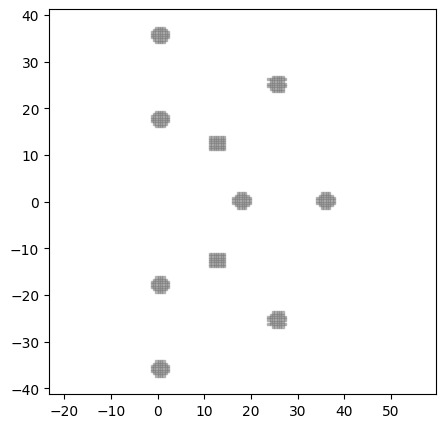

--------------------------------------------------
label: VentHole Chromosome_132: ['WingShape_794', 'CornerTransformation_356']
predict: (0.2885058294347178, 372.8712957999999, 456.13803379999996)
biased_fitness: 0.6342858413139509, fitness: 0.7198950576528224
shape parameter:
parameter_list: [ c: 3.9608759878912734, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


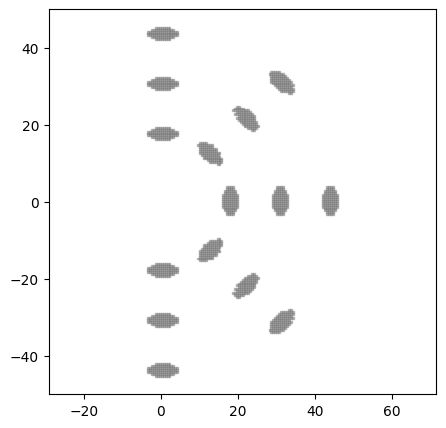

--------------------------------------------------
label: VentHole Chromosome_794: ['WingShape_132', 'CornerTransformation_776']
predict: (0.2887423160278302, 373.42694409999984, 457.82212469999996)
biased_fitness: 0.6248286057103782, fitness: 0.7063314957216991
shape parameter:
parameter_list: [ c: 3.9608759878912734, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


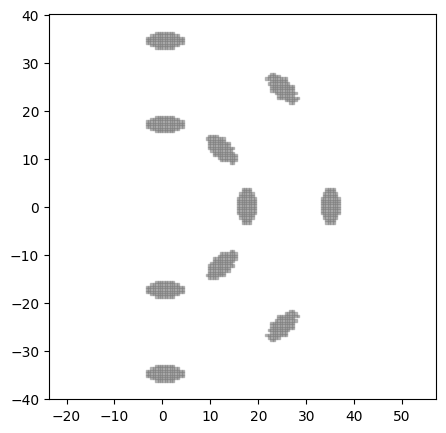

--------------------------------------------------
label: VentHole Chromosome_669: ['CircleShape_865', 'CornerTransformation_794']
predict: (0.28891391232853003, 373.289346, 458.9351839999997)
biased_fitness: 0.6208881294005798, fitness: 0.6997382267147009
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


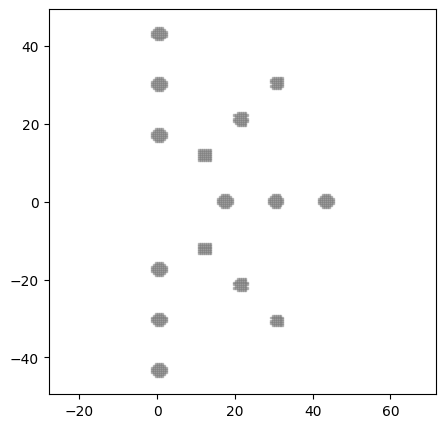

--------------------------------------------------
label: VentHole Chromosome_669: ['CircleShape_132', 'CornerTransformation_593']
predict: (0.28856375755765784, 373.02734220000013, 456.8516698)
biased_fitness: 0.6312673435927894, fitness: 0.7149673644234207
shape parameter:
parameter_list: [ r: 2.156258166334942, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


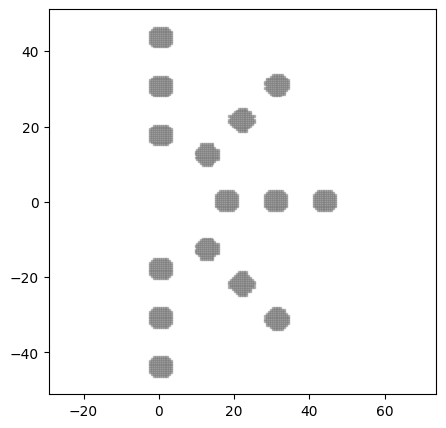

--------------------------------------------------
label: VentHole Chromosome_794: ['CircleShape_132', 'CornerTransformation_93']
predict: (0.2894695299987604, 373.5042318999999, 457.3412598000002)
biased_fitness: 0.615222900917354, fitness: 0.701077241512395
shape parameter:
parameter_list: [ r: 2.383336889516968, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


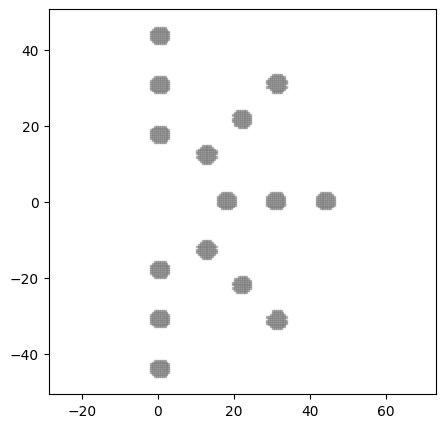

--------------------------------------------------
label: VentHole Chromosome_93: ['CircleShape_776', 'CornerTransformation_794']
predict: (0.28893308030202824, 372.85402470000014, 456.80044339999984)
biased_fitness: 0.6270658654716041, fitness: 0.7123968564797176
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


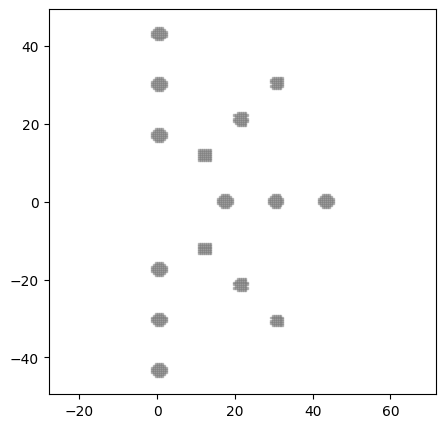

--------------------------------------------------
label: VentHole Chromosome_693: ['WingShape_102', 'CornerTransformation_815']
predict: (0.2889188238254634, 372.9563100000001, 458.02810309999995)
biased_fitness: 0.6242987102435118, fitness: 0.7058896962453656
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7796645111152577, rot_count: 3.0, ]


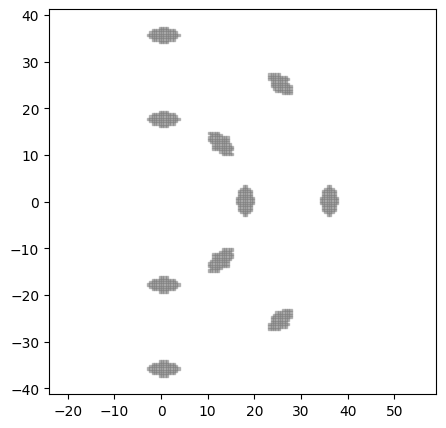

--------------------------------------------------
label: VentHole Chromosome_132: ['WingShape_593', 'CornerTransformation_669']
predict: (0.28856375755765784, 373.02734220000013, 456.8516698)
biased_fitness: 0.6312673435927894, fitness: 0.7149673644234207
shape parameter:
parameter_list: [ c: 3.0850270335125924, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


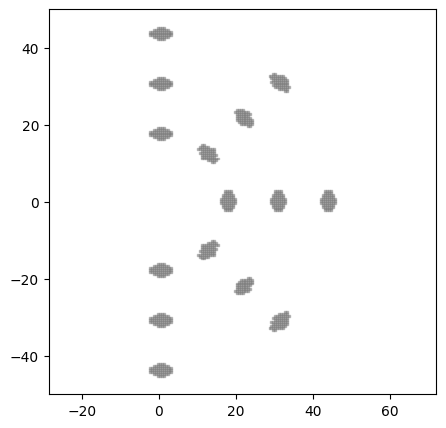

--------------------------------------------------
label: VentHole Chromosome_132: ['CircleShape_693', 'CornerTransformation_452']
predict: (0.2901756709035508, 373.87374289999985, 457.60489209999986)
biased_fitness: 0.6029621086502899, fitness: 0.6908501159644934
shape parameter:
parameter_list: [ r: 2.156258166334942, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


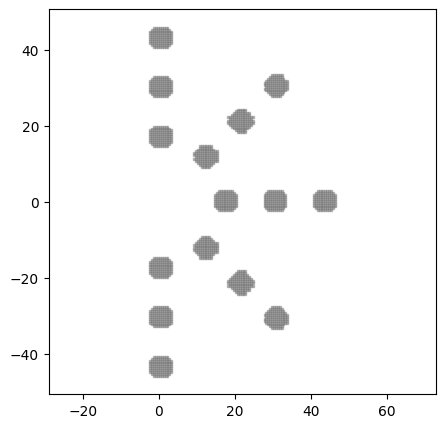

--------------------------------------------------
label: VentHole Chromosome_132: ['CircleShape_794', 'CornerTransformation_794']
predict: (0.2895512721963449, 373.46484660000004, 456.42197669999985)
biased_fitness: 0.6161140028511712, fitness: 0.7050531615365514
shape parameter:
parameter_list: [ r: 2.383336889516968, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 6.168959139489781, phi: 0.7853981633974483, rot_count: 3.0, ]


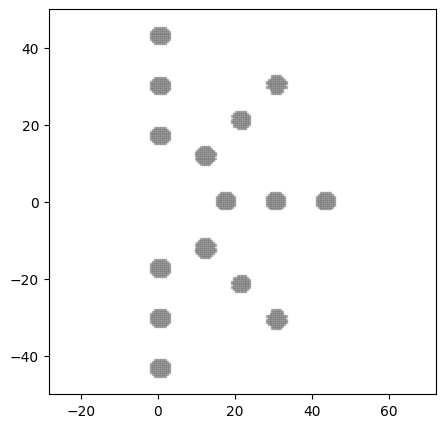

--------------------------------------------------
label: VentHole Chromosome_815: ['CircleShape_815', 'CornerTransformation_865']
predict: (0.2901756709035508, 373.87374289999985, 457.60489209999986)
biased_fitness: 0.6029621086502899, fitness: 0.6908501159644934
shape parameter:
parameter_list: [ r: 2.156258166334942, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7796645111152577, rot_count: 3.0, ]


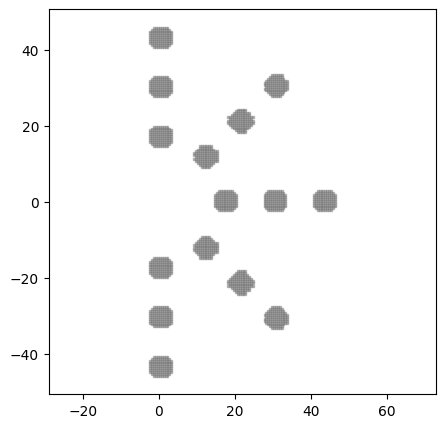

--------------------------------------------------
label: VentHole Chromosome_794: ['CircleShape_794', 'CornerTransformation_865']
predict: (0.2894695299987604, 373.5042318999999, 457.3412598000002)
biased_fitness: 0.615222900917354, fitness: 0.701077241512395
shape parameter:
parameter_list: [ r: 2.383336889516968, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


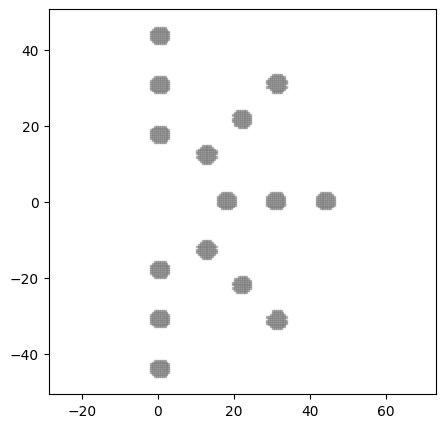

--------------------------------------------------
label: VentHole Chromosome_970: ['CircleShape_794', 'CornerTransformation_132']
predict: (0.2894695299987604, 373.5042318999999, 457.3412598000002)
biased_fitness: 0.615222900917354, fitness: 0.701077241512395
shape parameter:
parameter_list: [ r: 2.383336889516968, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


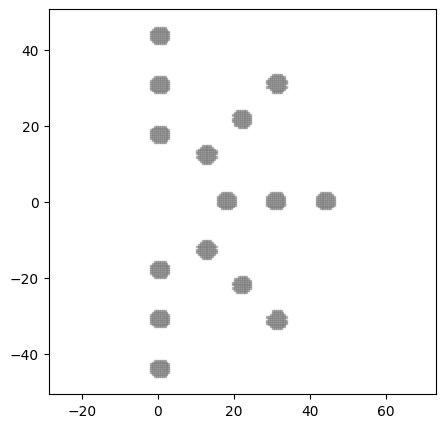

--------------------------------------------------
label: VentHole Chromosome_669: ['CircleShape_330', 'CornerTransformation_430']
predict: (0.2894695299987604, 373.5042318999999, 457.3412598000002)
biased_fitness: 0.615222900917354, fitness: 0.701077241512395
shape parameter:
parameter_list: [ r: 2.383336889516968, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7739308588330671, rot_count: 3.0, ]


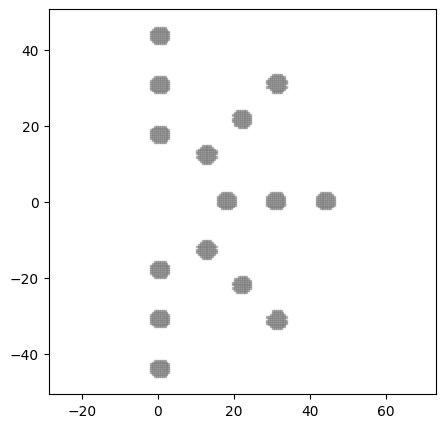

--------------------------------------------------
label: VentHole Chromosome_537: ['WingShape_865', 'CornerTransformation_776']
predict: (0.288419709926965, 372.80765479999997, 455.76952399999993)
biased_fitness: 0.6365467390224905, fitness: 0.7229170067303506
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


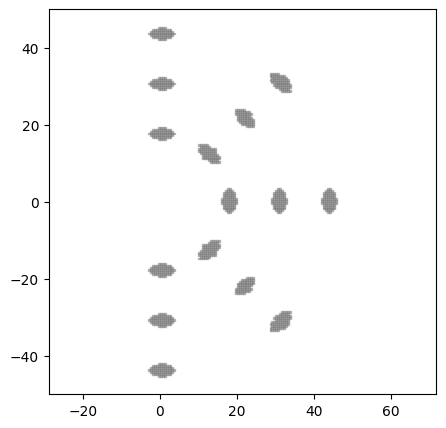

--------------------------------------------------
label: VentHole Chromosome_865: ['CircleShape_794', 'CornerTransformation_339']
predict: (0.2889005050031339, 372.8004323, 457.38010049999997)
biased_fitness: 0.626630567456125, fitness: 0.7100922859686608
shape parameter:
parameter_list: [ r: 2.0334216092985544, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 8.061261883220816, phi: 0.7853981633974483, rot_count: 3.0, ]


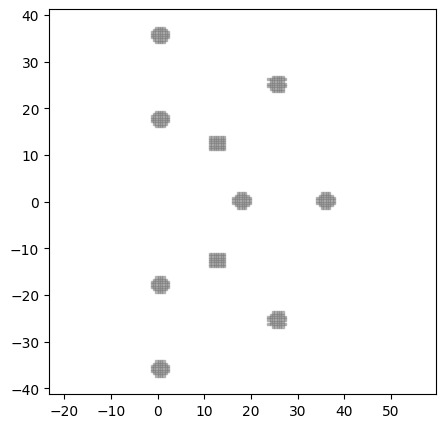

--------------------------------------------------
label: VentHole Chromosome_776: ['WingShape_874', 'CornerTransformation_330']
predict: (0.2889188238254634, 372.9563100000001, 458.02810309999995)
biased_fitness: 0.6242987102435118, fitness: 0.7058896962453656
shape parameter:
parameter_list: [ c: 4.527457043957726, ]
pattern parameter:
parameter_list: [ di: 12.742500206827566, dx: 3.110149698617792, phi: 0.7853981633974483, rot_count: 3.0, ]


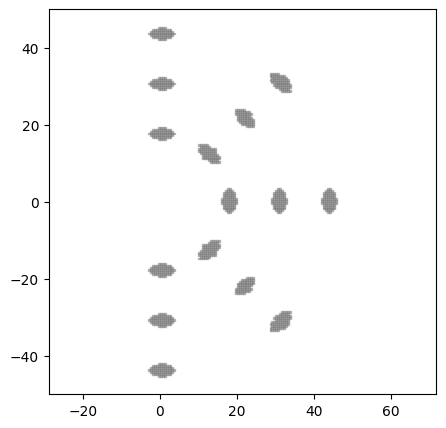

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )